In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [9]:
datos = pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',')

In [10]:
demiinteres = datos[datos["Comuna"]== "Las Condes"] 

In [11]:
demiinteres.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,Tasa
108,Metropolitana,13,Las Condes,13114.0,330759.0,181.0,208.0,224.0,258.0,266.0,...,21394.0,21589.0,21754.0,21847.0,21967.0,22028.0,22122.0,22160.0,22193.0,6709.7


In [12]:
nuevo = demiinteres.melt(id_vars=["Region","Codigo region", "Comuna","Codigo comuna","Poblacion", "Tasa"], var_name="Fecha", value_name="Casos")

In [13]:
nuevo.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Tasa,Fecha,Casos
0,Metropolitana,13,Las Condes,13114.0,330759.0,6709.7,2020-03-30,181.0
1,Metropolitana,13,Las Condes,13114.0,330759.0,6709.7,2020-04-01,208.0
2,Metropolitana,13,Las Condes,13114.0,330759.0,6709.7,2020-04-03,224.0
3,Metropolitana,13,Las Condes,13114.0,330759.0,6709.7,2020-04-06,258.0
4,Metropolitana,13,Las Condes,13114.0,330759.0,6709.7,2020-04-08,266.0


In [14]:
datos1 = nuevo[['Region','Comuna','Fecha','Casos']]

In [15]:
datos1['Fecha'] = pd.to_datetime(datos1['Fecha'])

<ipython-input-15-9fb560b36e97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['Fecha'] = pd.to_datetime(datos1['Fecha'])


In [16]:
dat= datos1.groupby('Comuna').resample('W-Mon', on='Fecha').sum().reset_index().sort_values(by='Fecha')

In [17]:
dat["Resta"] = dat["Casos"]-dat["Casos"].shift()

In [18]:
dat.head()

,Comuna,Fecha,Casos,Resta
0,Las Condes,2020-03-30,181.0,NaN
1,Las Condes,2020-04-06,690.0,509.0
2,Las Condes,2020-04-13,843.0,153.0
3,Las Condes,2020-04-20,952.0,109.0
4,Las Condes,2020-04-27,701.0,-251.0


In [19]:
datos2 = dat[dat["Resta"] > 0].reset_index() 

In [22]:
datos2.drop('Casos', axis=1, inplace=True)

<AxesSubplot:xlabel='Fecha', ylabel='Resta'>

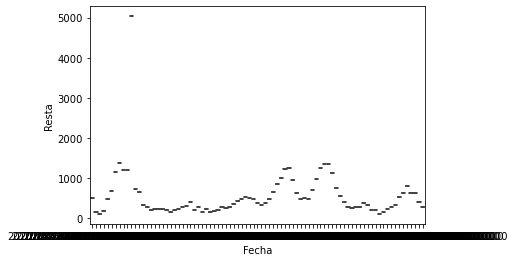

In [23]:
sns.boxplot(x="Fecha", y="Resta", data=datos2)

<AxesSubplot:xlabel='Fecha', ylabel='Resta'>

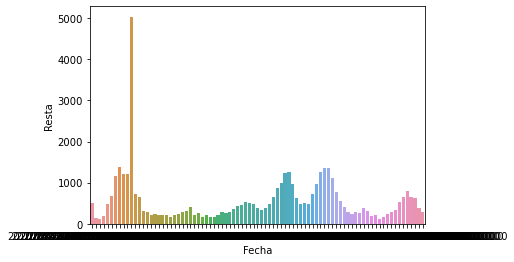

In [24]:
sns.barplot(x="Fecha", y="Resta", data=datos2)

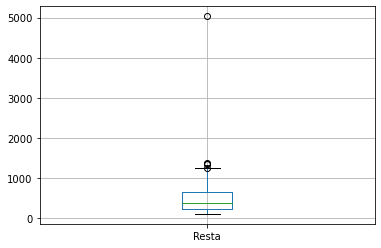

In [28]:
outlierslascondes = datos2.boxplot(column = ["Resta"])

In [27]:
outliers= datos2[datos2["Resta"]> 1350]

In [30]:
outliers.head()

,Comuna,Fecha,Resta
7,Las Condes,2020-06-01,1373.0
10,Las Condes,2020-06-29,5033.0
60,Las Condes,2021-06-14,1352.0


<AxesSubplot:xlabel='Fecha', ylabel='Resta'>

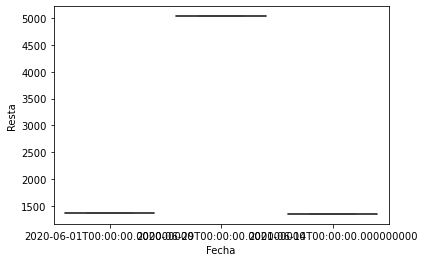

In [31]:
sns.boxplot(x="Fecha", y="Resta", data=outliers)